# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1000)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 465


In [3]:
# Print the list of cities
print(cities)

['khovd', 'egilsstadir', 'puerto natales', 'guasdualito', 'bandarbeyla', 'albany', 'nantucket', 'edinburgh of the seven seas', 'jamestown', 'iqaluit', 'tura', 'adamstown', 'whitehorse', 'chandler', 'kyelang', 'blackmans bay', 'nova sintra', 'saint-joseph', 'ola', 'nicoya', 'bata', 'karwar', 'chibougamau', 'colonia', 'atafu village', 'khandyga', 'hamilton', 'ulan bator', 'petropavlovsk-kamchatsky', 'thompson', 'grytviken', 'tiksi', 'rio grande', 'choyr', 'nahavand', 'waitangi', 'arraial do cabo', 'sorokyne', 'ilulissat', 'west island', 'stanley', 'ulladulla', 'bredasdorp', 'port-aux-francais', 'polyarnyy', 'port douglas', 'wailua homesteads', 'charters towers', 'chonchi', 'nemuro', 'kimberley', 'georgetown', 'hawaiian paradise park', 'olonkinbyen', 'yellowknife', 'nouadhibou', 'port lincoln', 'hadibu', 'lihue', 'montevideo', 'kimbe', 'lebu', 'bethel', 'pauini', 'mombetsu', 'saudarkrokur', 'belaya kholunitsa', 'kasongo-lunda', 'bilibino', 'sao vicente', 'olyokminsk', 'hasaki', 'tabou', '

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        time.sleep(25)

    # Create endpoint URL with each city
#     city_url = url + "q=" + city + "&appid=" + weather_api_key
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        #city_weather = # YOUR CODE HERE
        city_weather = requests.get(city_url).json()


        #Given datetime value
        timestamp = city_weather['dt']

        #convert the timestamp to a tuple of struct_time
        time_tuple = time.gmtime(timestamp)
    
        # format the time to a string in the desired format
        formatted_date = time.strftime('%Y/%m/%d', time_tuple)


        # Kelvin to Fahrenheit coversion
        # Equation: Fahrenheit = (Kelvin - 273.15)*9/5 +  32
        city_temp_f = (city_weather['main']['temp_max'] - 273.15) * 9/5 + 32
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_temp_f
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = formatted_date

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | khovd
City not found. Skipping...
Processing Record 2 of Set 1 | egilsstadir
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | guasdualito
Processing Record 5 of Set 1 | bandarbeyla
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | nantucket
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | iqaluit
Processing Record 11 of Set 1 | tura
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | whitehorse
Processing Record 14 of Set 1 | chandler
Processing Record 15 of Set 1 | kyelang
Processing Record 16 of Set 1 | blackmans bay
Processing Record 17 of Set 1 | nova sintra
Processing Record 18 of Set 1 | saint-joseph
Processing Record 19 of Set 1 | ola
Processing Record 20 of Set 1 | nicoya
Processing Record 21 of Set 1 | bata
Processing Record 22 of Set 1 |

Processing Record 34 of Set 4 | happy valley-goose bay
Processing Record 35 of Set 4 | nanga eboko
Processing Record 36 of Set 4 | san antonio de pale
Processing Record 37 of Set 4 | kayyerkan
Processing Record 38 of Set 4 | lajere
Processing Record 39 of Set 4 | itoman
Processing Record 40 of Set 4 | kingston
Processing Record 41 of Set 4 | kupang
Processing Record 42 of Set 4 | callao
Processing Record 43 of Set 4 | codrington
Processing Record 44 of Set 4 | yanam
Processing Record 45 of Set 4 | ar rahad
Processing Record 46 of Set 4 | muli
Processing Record 47 of Set 4 | minas de marcona
Processing Record 48 of Set 4 | timbuktu
Processing Record 49 of Set 4 | mezhdurechensk
Processing Record 0 of Set 5 | vilyuchinsk
Processing Record 1 of Set 5 | teknaf
Processing Record 2 of Set 5 | northam
Processing Record 3 of Set 5 | mejit
Processing Record 4 of Set 5 | belyy yar
Processing Record 5 of Set 5 | aguilar de campoo
Processing Record 6 of Set 5 | havre
Processing Record 7 of Set 5 |

Processing Record 29 of Set 8 | castillos
Processing Record 30 of Set 8 | nazyvayevsk
Processing Record 31 of Set 8 | salalah
Processing Record 32 of Set 8 | puerto baquerizo moreno
Processing Record 33 of Set 8 | dolbeau-mistassini
Processing Record 34 of Set 8 | chernyshevsk
Processing Record 35 of Set 8 | aglona
Processing Record 36 of Set 8 | masterton
Processing Record 37 of Set 8 | vozhega
Processing Record 38 of Set 8 | chimoio
Processing Record 39 of Set 8 | san vicente de canete
Processing Record 40 of Set 8 | sturgis
Processing Record 41 of Set 8 | damara
Processing Record 42 of Set 8 | qarazhal
Processing Record 43 of Set 8 | tobi village
City not found. Skipping...
Processing Record 44 of Set 8 | cividale del friuli
Processing Record 45 of Set 8 | jieshou
Processing Record 46 of Set 8 | cargados carajos
City not found. Skipping...
Processing Record 47 of Set 8 | kani keli
Processing Record 48 of Set 8 | santa rita do passa quatro
Processing Record 49 of Set 8 | portage la p

In [5]:
print(city_data)

[{'City': 'egilsstadir', 'Lat': 65.2653, 'Lng': -14.3948, 'Max Temp': 35.51000000000008, 'Humidity': 93, 'Cloudiness': 100, 'Wind Speed': 10.29, 'Country': 'IS', 'Date': '2023/11/06'}, {'City': 'puerto natales', 'Lat': -51.7236, 'Lng': -72.4875, 'Max Temp': 45.05, 'Humidity': 61, 'Cloudiness': 40, 'Wind Speed': 5.66, 'Country': 'CL', 'Date': '2023/11/06'}, {'City': 'guasdualito', 'Lat': 7.2424, 'Lng': -70.7324, 'Max Temp': 78.76400000000004, 'Humidity': 94, 'Cloudiness': 40, 'Wind Speed': 0, 'Country': 'VE', 'Date': '2023/11/06'}, {'City': 'bandarbeyla', 'Lat': 9.4942, 'Lng': 50.8122, 'Max Temp': 79.016, 'Humidity': 83, 'Cloudiness': 100, 'Wind Speed': 5.43, 'Country': 'SO', 'Date': '2023/11/06'}, {'City': 'albany', 'Lat': 42.6001, 'Lng': -73.9662, 'Max Temp': 44.36600000000001, 'Humidity': 60, 'Cloudiness': 64, 'Wind Speed': 3.01, 'Country': 'US', 'Date': '2023/11/06'}, {'City': 'nantucket', 'Lat': 41.2835, 'Lng': -70.0995, 'Max Temp': 53.15, 'Humidity': 87, 'Cloudiness': 0, 'Wind Spe

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          444
Lat           444
Lng           444
Max Temp      444
Humidity      444
Cloudiness    444
Wind Speed    444
Country       444
Date          444
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,egilsstadir,65.2653,-14.3948,35.510,93,100,10.29,IS,2023/11/06
1,puerto natales,-51.7236,-72.4875,45.050,61,40,5.66,CL,2023/11/06
2,guasdualito,7.2424,-70.7324,78.764,94,40,0.00,VE,2023/11/06
3,bandarbeyla,9.4942,50.8122,79.016,83,100,5.43,SO,2023/11/06
4,albany,42.6001,-73.9662,44.366,60,64,3.01,US,2023/11/06


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,egilsstadir,65.2653,-14.3948,35.510,93,100,10.29,IS,2023/11/06
1,puerto natales,-51.7236,-72.4875,45.050,61,40,5.66,CL,2023/11/06
2,guasdualito,7.2424,-70.7324,78.764,94,40,0.00,VE,2023/11/06
3,bandarbeyla,9.4942,50.8122,79.016,83,100,5.43,SO,2023/11/06
4,albany,42.6001,-73.9662,44.366,60,64,3.01,US,2023/11/06


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

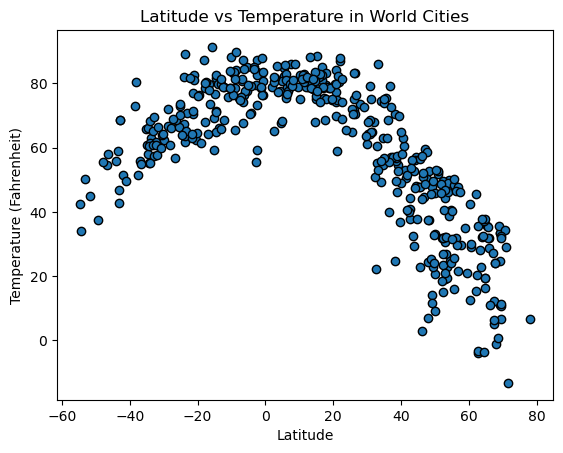

In [22]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker="o", edgecolors='black', linewidth=1)

# Incorporate the other graph properties
plt.title("Latitude vs Temperature in World Cities")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

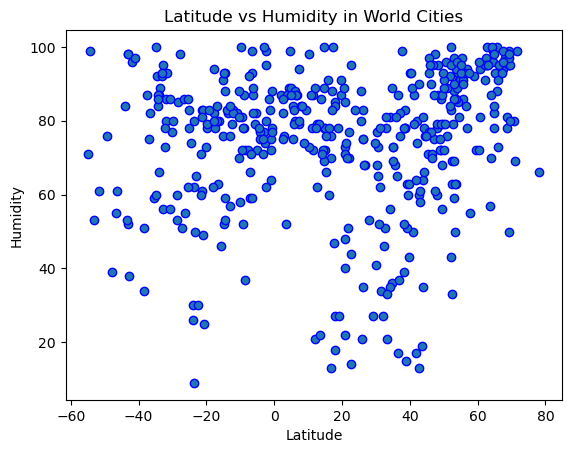

In [23]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker="o", edgecolors='blue', linewidth=1)

# Incorporate the other graph properties
plt.title("Latitude vs Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

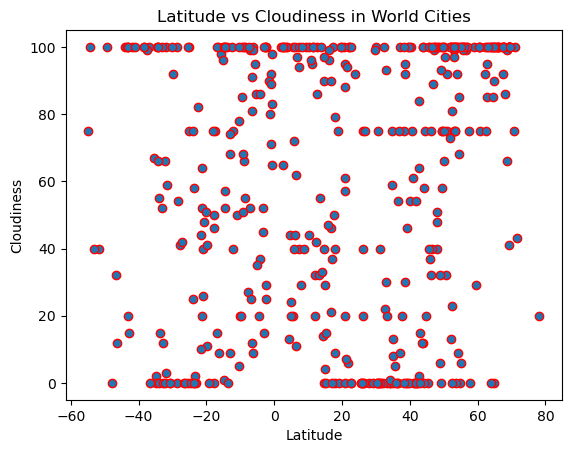

In [24]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker="o", edgecolors="red", linewidth=1)

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

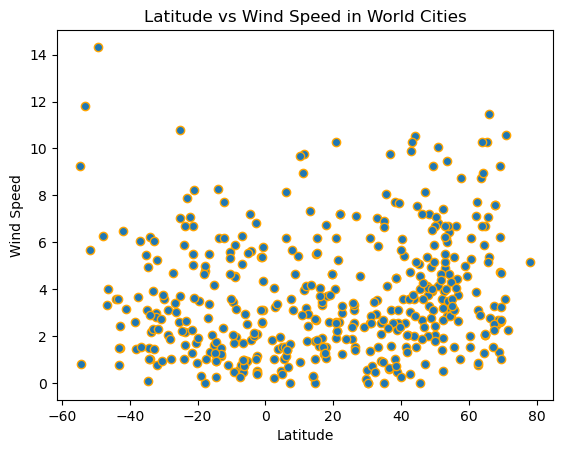

In [25]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', edgecolors='orange', linewidth=1)

# Incorporate the other graph properties
plt.title('Latitude vs Wind Speed in World Cities')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE